**Дескрипторы**

Дескриптором же называют объект со связанным поведением, то есть такой объект, чьё поведение при доступе к нему как к атрибуту переопределяется методами протокола дескрипторов: __get__(), __set__() и __delete__(). Если хотя бы один из этих методов определён для объекта, то он считается дескриптором.

метод __get__() принимает экземпляр класса и его класс

метод __set__() принимает экземпляр класса и устанавливаемое значение

метод __delete__() принимает лишь экземпляр класса

В методах протокола дескрипторов необходимо напрямую обращаться к словарю объекта __dict__, чтобы избежать исключения RecursionError, так как иные обращения к атрибуту будут перехватываться протоколом дескрипторов.

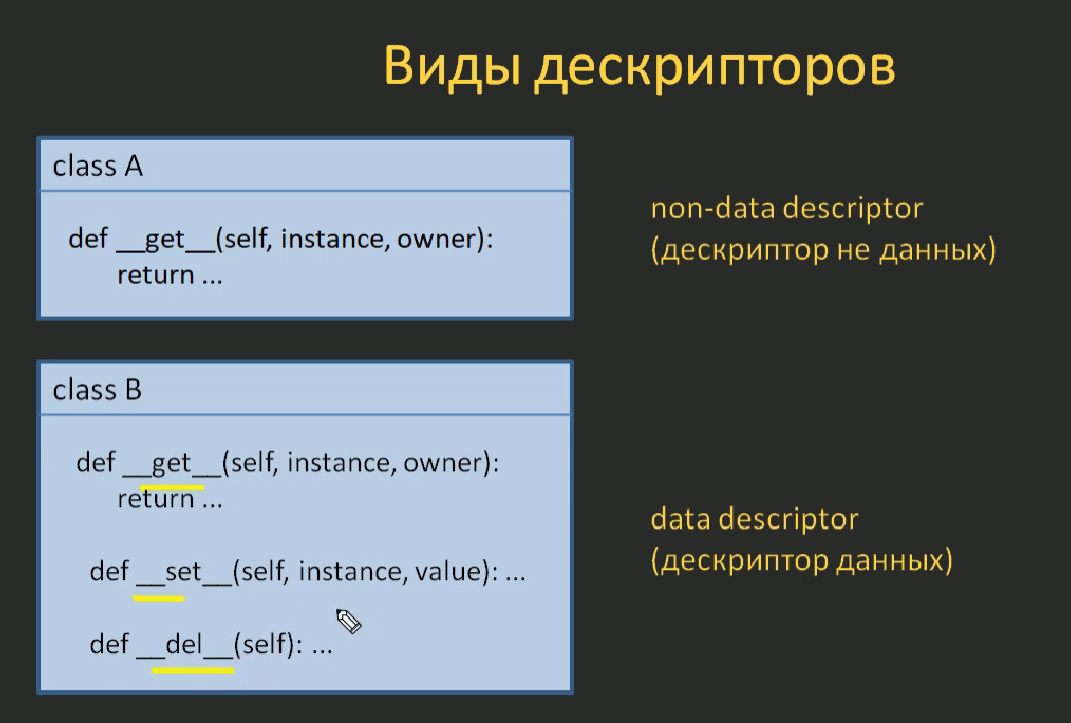

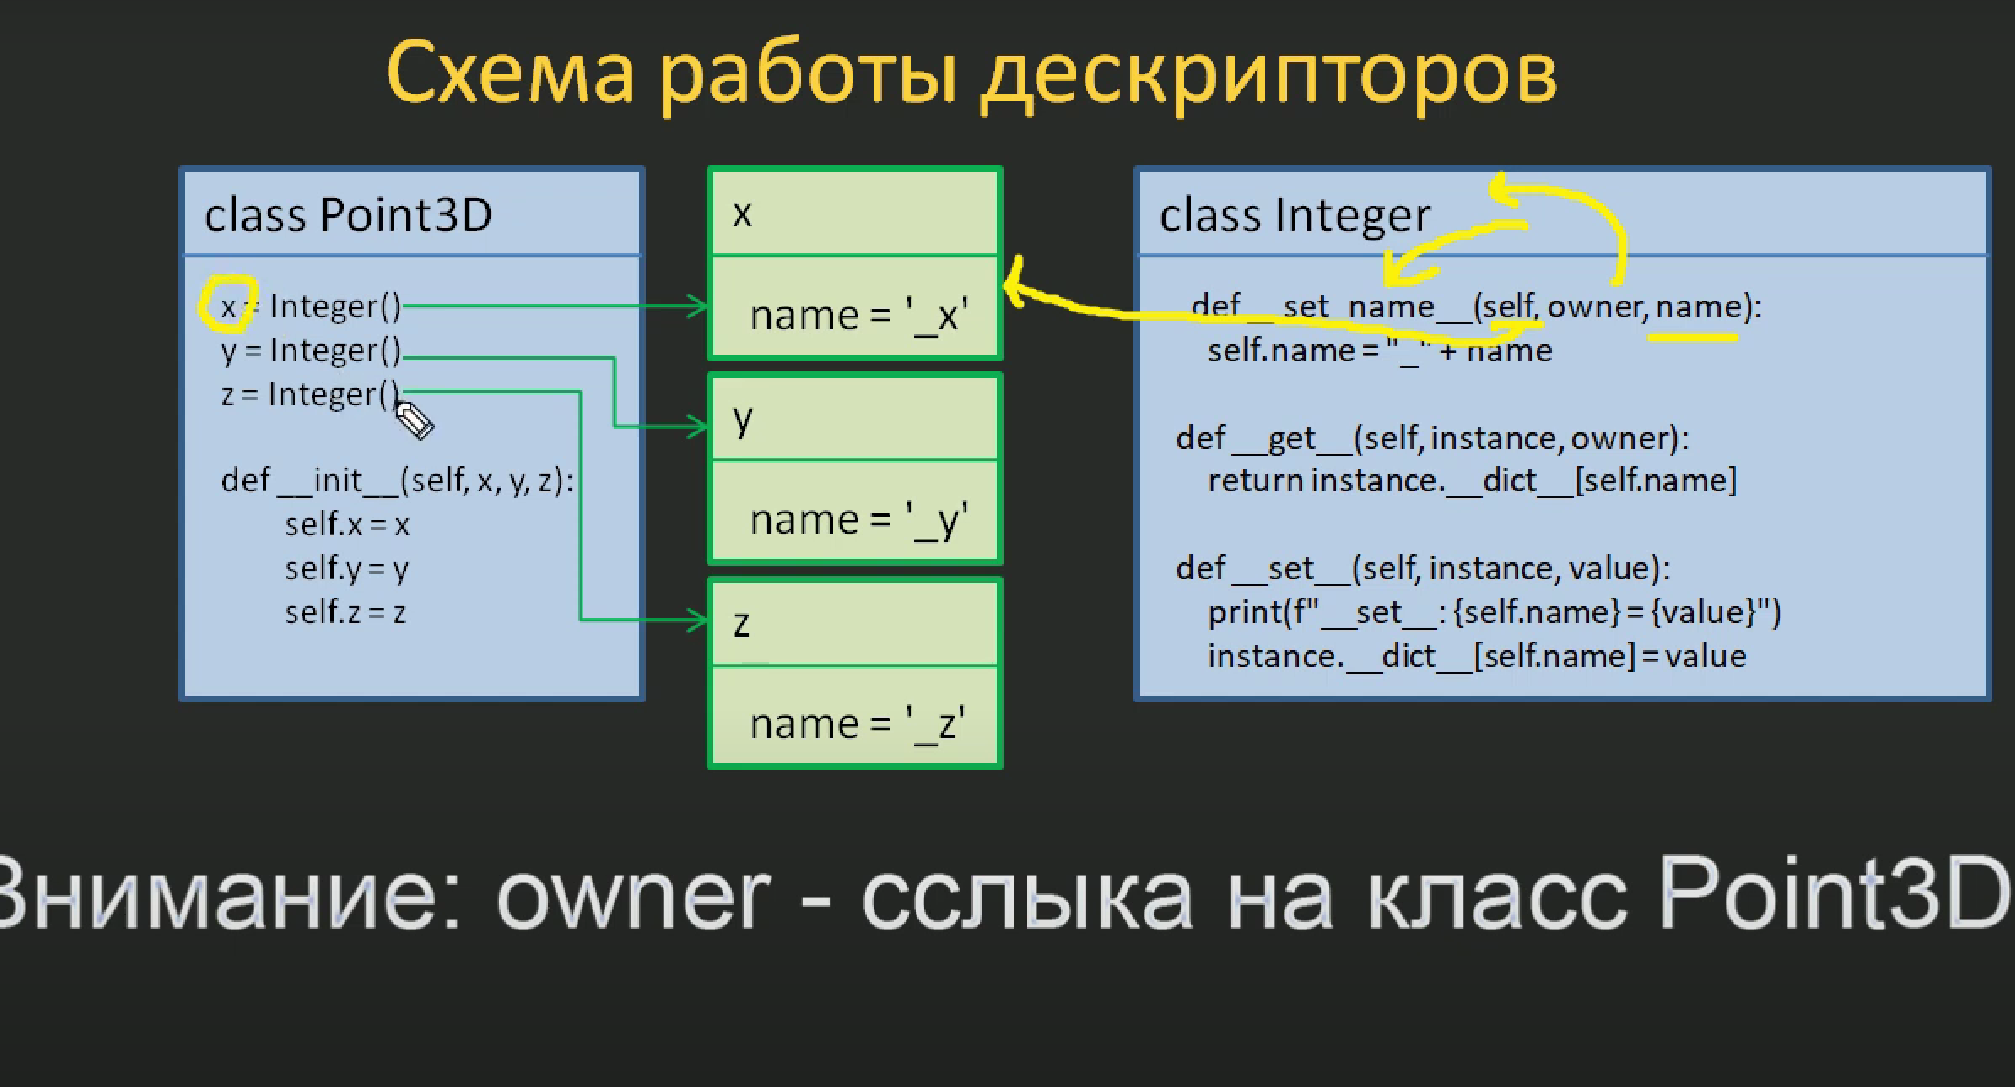

self - ссылка на экземпляр класса,
owner - ссылка на класс Point3D
name - это имена x, y, z



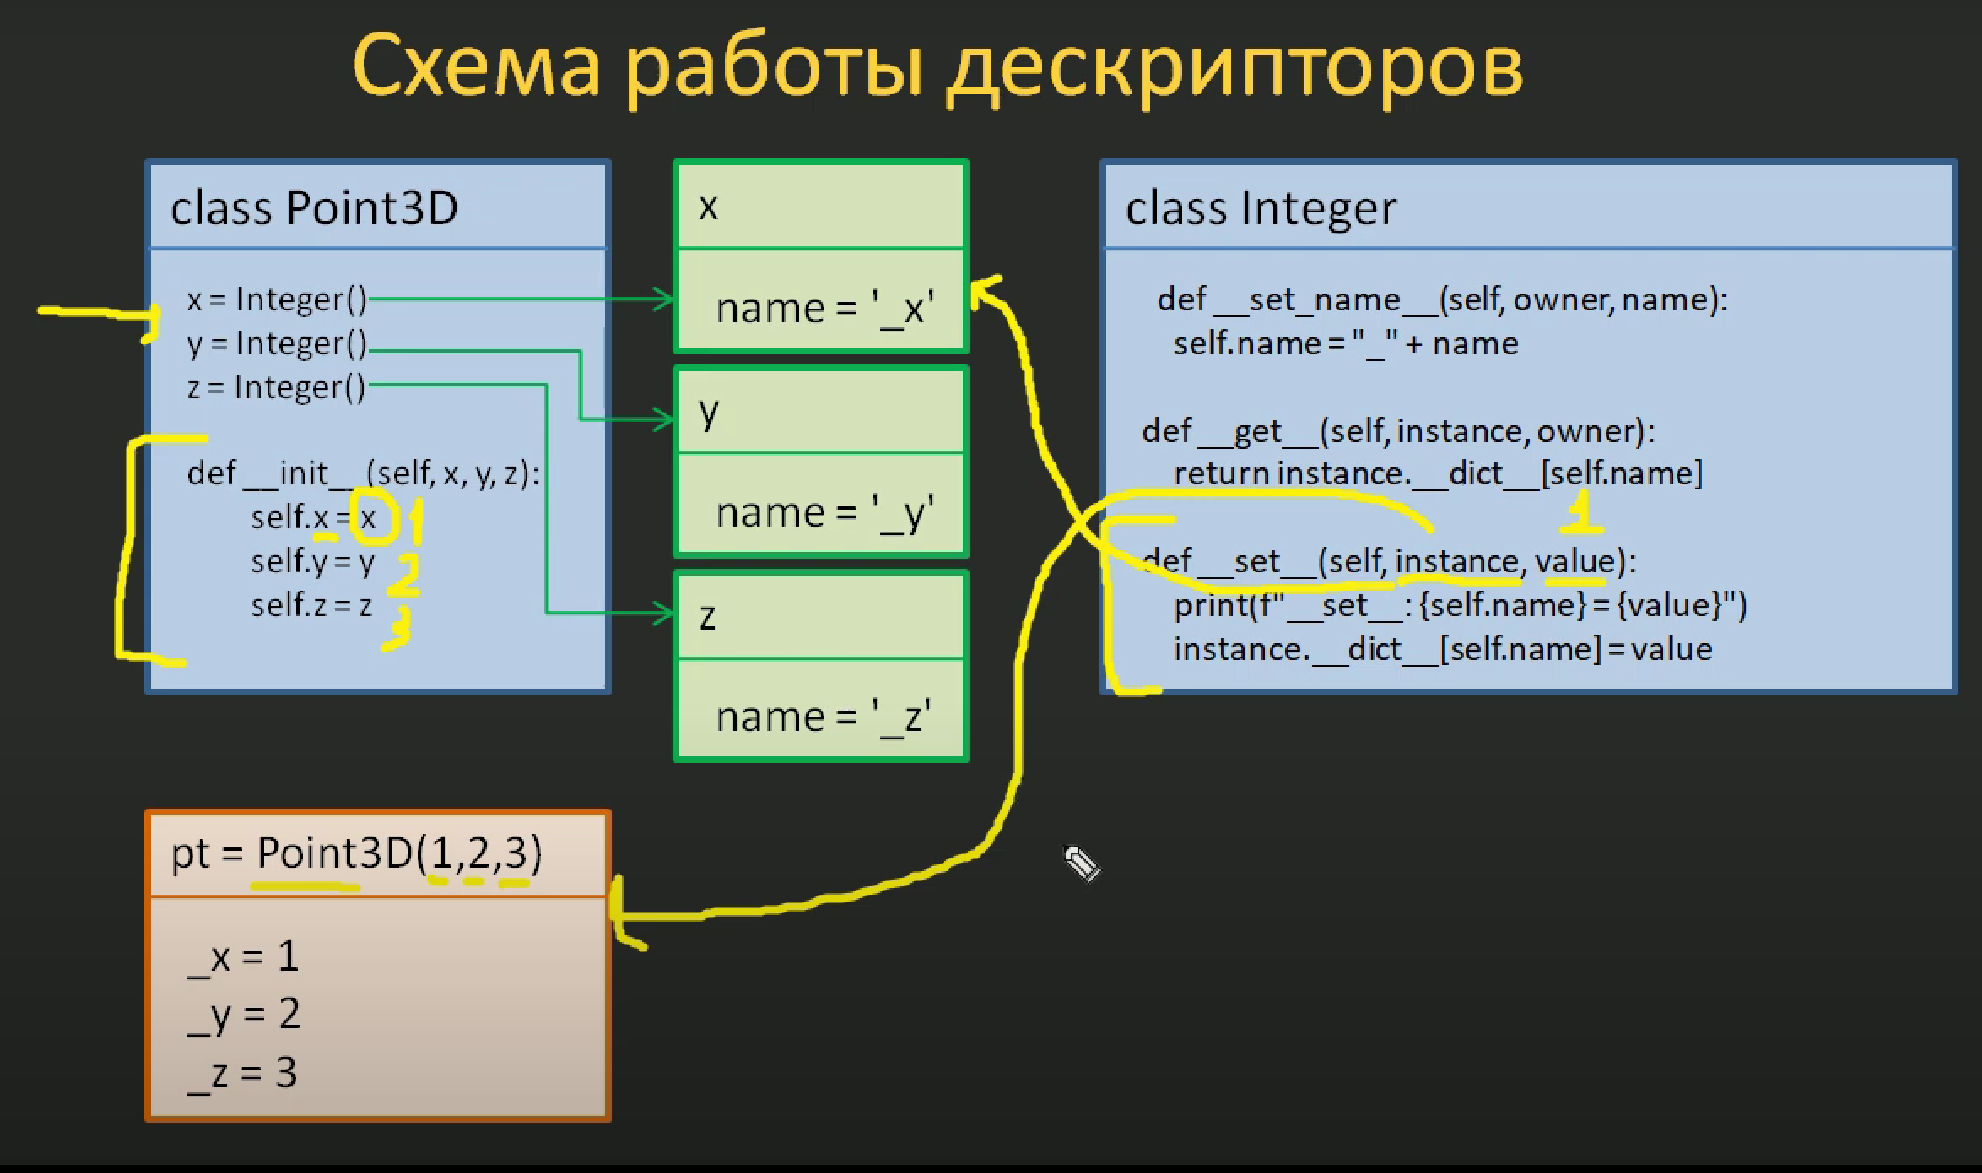

Преимущество дескрипторов - единый интерфейс взаимодействия, мы не дублируем оьъекты свойств, а прописываем всё в одной программе.

Задача 1.

Перепишите один из наших предыдущих классов (лингвиста, компьютерного лингвиста или программиста) таким образом, чтобы у него были два атрибута, управляемых дескриптором: зарплата и количество рабочих часов в неделю. Дескриптор должен не давать устанавливать зарплату меньше какого-то значения (можно поругаться), а количество рабочих часов - больше положенного.

Задача 3.

Перепишите задачу 1 таким образом, чтобы при попытке установить нелегальное значение атрибута возникало исключение ValueError с вашим текстом об ошибке.

In [ ]:
# Совместила 1 и 3
# Создам два дескриптора: один - для зарплаты, другой - для часов

In [ ]:
class Descriptor_1:

  def __set__(self, instance, value):
    if not isinstance(value, int):
      raise ValueError(f'Не является числом')
    if value < 19242:
      raise ValueError('Зарплата не может быть меньше 19242')
    instance.__dict__['salary'] = value

  def __get__(self, instance, owner):
    return instance.__dict__.get('salary')

In [ ]:
class Descriptor_2:

  def __set__(self, instance, value):
    if not isinstance(value, int):
      raise ValueError(f'Не является числом')
    if value > 40:
      raise ValueError('Количество рабочих часов не может превышать 40')
    instance.__dict__['working_hours'] = value

  def __get__(self, instance, owner):
    return instance.__dict__.get('working_hours')

In [ ]:
class Linguist:
  salary = Descriptor_1()
  working_hours = Descriptor_2()

  def __init__(self, name, surname, salary, working_hours):
    self.name = name
    self.surname = surname
    self.salary = salary
    self.working_hours = working_hours

  def work(self, hours):
    if hours < 0:
      raise ValueError('Время не может быть отрицательным')
    if hours > self.working_hours:
      raise ValueError(f'Время не может превышать {self.working_hours}')

  def complain(self):
    if self.salary < 19242:
      print(f'{self.name} {self.surname} жалуется: "Моя зарплата слишком низкая!"')
    if self.working_hours > 40:
      print(f'{self.name} {self.surname} жалуется: "Не могу работать больше 40 часов!"')

In [ ]:
if __name__ == "__main__":
  try:
      linguist = Linguist('Anna', 'Andreevna', 30000, 35)
      linguist.complain()

# Слишком низкая зарплата
      linguist.salary = 18000
  except ValueError as e:
        print(e)

  try:
# Слишком большое кол-во часов
      linguist.working_hours = 45
  except ValueError as e:
      print(e)

Зарплата не может быть меньше 19242
Количество рабочих часов не может превышать 40


Задача 4.

Добавьте к третьей задаче код, который будет перехватывать ваше исключение и требовать ввести правильное значение (в цикле, например).

In [ ]:
class Descriptor_1:
# дескрипторы не меняла
  def __set__(self, instance, value):
    if not isinstance(value, int):
      raise ValueError(f'Не является числом')
    if value < 19242 and value != 0:
      raise ValueError('Зарплата не может быть меньше 19242 / Зарплата не может быть нулём')
    instance.__dict__['salary'] = value

  def __get__(self, instance, owner):
    return instance.__dict__.get('salary')

In [ ]:
class Descriptor_2:

  def __set__(self, instance, value):
    if not isinstance(value, int):
      raise ValueError(f'Не является числом')
    if value > 40 and value != 0:
      raise ValueError('Количество рабочих часов не может превышать 40 / Кол-во часов не может быть нулём')
    instance.__dict__['working_hours'] = value

  def __get__(self, instance, owner):
    return instance.__dict__.get('working_hours')

In [ ]:
class Linguist:
  salary = Descriptor_1()
  working_hours = Descriptor_2()

  def __init__(self, name, surname):
    self.name = name
    self.surname = surname

# Добавлю функцию для введения зарплаты
def input_salary(linguist):
  while True:
    try:
      salary = int(input('Введите ЗП (больше чем 19242): '))
      linguist.salary = salary # вызову дескриптор
      break
    except ValueError as e:
      print(e)

# Добавлю функцию для введение количества часов
def input_working_hours(linguist):
  while True:
    try:
      working_hours = int(input('Введите кол-во рабочего времени (не больше 40ч): '))
      linguist.working_hours = working_hours #также вызову дескриптор
      break
    except ValueError as e:
      print(e)

In [ ]:
if __name__ == '__main__':
  name = input('Введите имя: ').lower()
  surname = input('Введите фамилию: ').lower()
  ling = Linguist(name, surname)
  input_salary(ling)
  input_working_hours(ling)

Введите имя: анна
Введите фамилию: андреевна
Введите ЗП (больше чем 19242): 12000
Зарплата не может быть меньше 19242 / Зарплата не может быть нулём
Введите ЗП (больше чем 19242): 2
Зарплата не может быть меньше 19242 / Зарплата не может быть нулём
Введите ЗП (больше чем 19242): 60000
Введите кол-во рабочего времени (не больше 40ч): 59
Количество рабочих часов не может превышать 40 / Кол-во часов не может быть нулём
Введите кол-во рабочего времени (не больше 40ч): 100
Количество рабочих часов не может превышать 40 / Кол-во часов не может быть нулём
Введите кол-во рабочего времени (не больше 40ч): 25


Задача 2.

Напишите скрипт, который будет пытаться открыть файл и считать из него текст. Отлавливаться должна ошибка UnicodeDecodeError. Файл обязательно должен закрываться. (То есть, нужно его открыть, попробовать с него что-нибудь прочитать, если получилось - что-нибудь сделать с прочитанным, и в любом случае файл закрыть).

In [41]:
from google.colab import files
uploaded = files.upload()

Saving булгаков.txt to булгаков (1).txt


In [42]:
def read_file(filename):
  try:
    with open(filename, 'r', encoding='utf-8') as file:
      content = file.read()
      print(content)
  except UnicodeDecodeError:
      print('Невозможно декодировать файл')
  except FileNotFoundError:
      print('Файл не найден')
  except Exception as e:
      print(f'Произошла ошибка: {e}')

In [45]:
filename = 'булгаков (1).txt'
read_file(filename)

Учиться читать совершенно ни к чему, когда мясо и так пахнет за версту. Тем не менее (ежели вы проживаете в Москве, и хоть какие-нибудь мозги у вас в голове имеются), вы волей-неволей научитесь грамоте, притом безо всяких курсов. Из сорока тысяч московских псов разве уж какой-нибудь совершенный идиот не сумеет сложить из букв слово «колбаса».

Шарик начал учиться по цветам. Лишь только исполнилось ему четыре месяца, по всей Москве развесили зелёно-голубые вывески с надписью МСПО – мясная торговля. Повторяем, всё это ни к чему, потому что и так мясо слышно. И путаница раз произошла: равняясь по голубоватому едкому цвету, Шарик, обоняние которого зашиб бензинным дымом мотор, вкатил вместо мясной в магазин электрических принадлежностей братьев Голубизнер на Мясницкой улице. Там у братьев пёс отведал изолированной проволоки, она будет почище извозчичьего кнута. Этот знаменитый момент и следует считать началом Шариковского образования. Уже на тротуаре тут же Шарик начал соображать, что «гол

Задача 1 (10 баллов).

Напишите программу, которая будет автоматически обрабатывать сырой корпус текстов. Что это должно быть:

у нас есть некоторое количество текстовых файлов, которые лежат рассортированными по папкам. Вложенных подпапок может быть много.
мы хотим вытащить тексты из всех этих файлов, разобрать их (можно использовать парсер spacy или stanza) и позаписать в новой директории одноименные conllu.
Пользователь при старте программы указывает путь к главной директории исходных файлов и желаемое название папки с аутпутом. Мы должны: а) проверить, что директория с исходниками существует; б) что пользователь не ввел название, в котором есть :, ? и подобные символы, которые запрещены системой в названиях файлов.
метод, который будет заниматься открыванием файлов и считыванием текста из них, должен не вываливать ошибку в случае, если у нас файл не в той кодировке, а только делать предупреждение и пропускать файл.
при этом должны вестись логи с именами пропущенных файлов. Логи записываем в errors.txt.
естественно, все должно быть в классах. Примерная структура может быть такой:

In [61]:
import os
import spacy
import re
!pip install conllu
from conllu import TokenList
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 53.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [62]:
# а) проверить, что директория с исходниками существует;
class Descriptor:
  def __init__(self):
    self._path = None

  def __get__(self, instance, owner):
    return self._path
# б) что пользователь не ввел название, в котором есть :, ? и подобные символы, которые запрещены системой в названиях файлов
  def __set__(self, instance, value):
    symbols = re.findall(r'[?*/|":<>]', value)
    if symbols:
      raise ValueError(f'В "{value}" есть недопустимые символы: {symbols}')
    if not os.path.exists(value) or not os.path.isdir(value):
      raise FileNotFoundError(f'Директория "{value}" не существует')
    self._path = value

In [63]:
class CorpusCreator:
  input = Descriptor()
  output = Descriptor()

  def __init__(self, input, output):
    self.nlp = spacy.load('en_core_web_sm')
    self.input.set(input)
    self.output.set(output)
    self.error_log = list()

  def open(self, file_path):
    try:
      with open(file_path, 'r', encoding='utf-8') as file:
        return file_path
    except (UnicodeDecodeError, FileNotFoundError) as e:
          self.error_log.append(file_path)
          print(f'Файл не открывается {file_path}: {e}')
          return None

  def parse(self, text):
    doc = self.nlp(text)
    sentences = []
    for sent in doc.sents:
      tokens = []
      for token in sent:
        tokens.append({
                    'id': token.i + 1,
                    'form': token.text,
                    'lemma': token.lemma_,
                    'upostag': token.pos_,
                    'xpostag': '_',
                    'feats': str(token.morph),
                    'head': token.head.i + 1 if token.head != token else 0,
                    'deprel': token.dep_,
                    'deps': '_',
                    'misc': '_'})
        sentences.append(tokens)
    return sentences

  def write_file(self, output_path, parsed_doc):
    with open(output_path, 'w', encoding='utf-8') as file:
      for sentence in parsed_doc:
        for token in sentence:
          file.write(f"{token['id']}t{token['form']}t{token['lemma']}t{token['upostag']}t{token['deprel']}n")
        file.write('n')

  def process(self):
    if not os.path.exists(self.output.get()):
      os.makedirs(self.output.get())
      for root, _, files in os.walk(self.input.get()):
        for file in files:
          if file.endswith('.txt'):
            file_path = os.path.join(root, file)
            text = self.open_file(file_path)
            if text is not None:
              parsed_doc = self.parse(text)
              output_file_name = f'{os.path.splitext(file)[0]}.conllu'
              output_path = os.path.join(self.output.get(), output_file_name)
              self.write_file(output_path, parsed_doc)

      if self.error_log:
        with open(os.path.join(self.output.get(), 'errors.txt'), 'w', encoding='utf-8') as log_file:
          for error in self.error_log:
            log_file.write(f'{error}n')

In [ ]:
if __name__ == '__main__':
  input_dir = input('Путь к директории: ')
  output_dir = input('Название папки: ')
  corpus_creator = CorpusCreator(input_dir, output_dir)
  corpus_creator.process()